<a href="https://colab.research.google.com/github/ShibuGitB/task/blob/main/cat_%26_dog_image_classifiication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
import pandas as pd

In [ ]:
data=[]
target=[]
categories=["cat","dog"]

datadir="/content/drive/MyDrive/data"
for i in categories :

  print ("loading",i)
  path=os.path.join(datadir,i)
  images=os.listdir(path)
  for j in images :

    img=os.path.join(path,j)
    imr=imread(img)
    imgrs=resize(imr,(150,150,3))
    imgf=imgrs.flatten()
    data.append(imgf)
    target.append(categories.index(i))

  print ("loaded category",i)

loading cat
loaded category cat
loading dog
loaded category dog


In [ ]:
import numpy as np

x=pd.DataFrame(data)
y=np.array(target)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.svm import SVC
z=SVC(kernel="linear")
z.fit(x_train,y_train)
w=z.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
print (accuracy_score(y_test,w))

0.5526315789473685


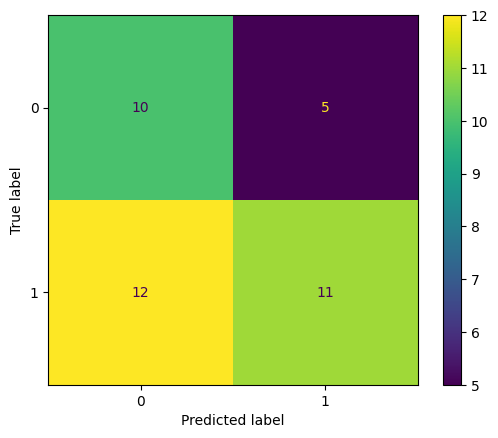

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
print (ConfusionMatrixDisplay.from_predictions(y_test,w))

In [ ]:
from sklearn.metrics import classification_report
print (classification_report(y_test,w))

              precision    recall  f1-score   support

           0       0.45      0.67      0.54        15
           1       0.69      0.48      0.56        23

    accuracy                           0.55        38
   macro avg       0.57      0.57      0.55        38
weighted avg       0.60      0.55      0.55        38



In [ ]:
newpath="/content/drive/MyDrive/th (4).jpeg"
newread=imread(newpath)
newim=resize(newread,(150,150,3))
newimg=newim.flatten()
newimg

array([0.645703  , 0.69294445, 0.63725173, ..., 0.46126783, 0.52130183,
       0.19723656])

In [ ]:
newimg.shape

(67500,)

In [ ]:
x_train.shape

(88, 67500)

In [ ]:
x_test.shape

(38, 67500)

In [ ]:
newimg2=newimg.reshape(1,-1)

In [ ]:
newimg2.shape

(1, 67500)

In [ ]:
prediction=z.predict(newimg2)

if prediction==1 :

  print ("dog")

else :

  print ("cat")

dog
